# Máy học nâng cao - Lab 02
# Họ tên: Nguyễn Phú Thành - MSSV: 18110014

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


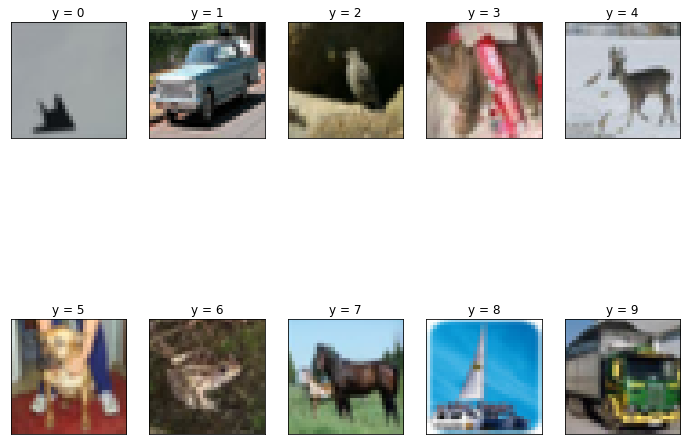

In [3]:
fig, axes = plt.subplots(figsize = (12, 10), nrows = 2, ncols = 5)
rnd = np.random.RandomState(0)
for label, ax in zip(np.unique(y_train), axes.flatten()):
    subset = X_train[(y_train == label).flatten()]
    index = rnd.choice(subset.shape)
    ax.imshow(subset[index - 1])
    ax.set(title = f'y = {label}', xticks = [], yticks = [])
plt.show()

In [4]:
X_train, X_test = X_train.astype(np.float)/255.0, X_test.astype(np.float)/255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)

In [5]:
for (X, y) in zip((X_train, X_valid, X_test), (y_train, y_valid, y_test)):
    print(X.shape, y.shape)

(45000, 32, 32, 3) (45000, 1)
(5000, 32, 32, 3) (5000, 1)
(10000, 32, 32, 3) (10000, 1)


Hãy code thử mạng VGG16 và nêu cách chọn ra epoch thứ bao nhiêu làm cho model tốt nhất </br>
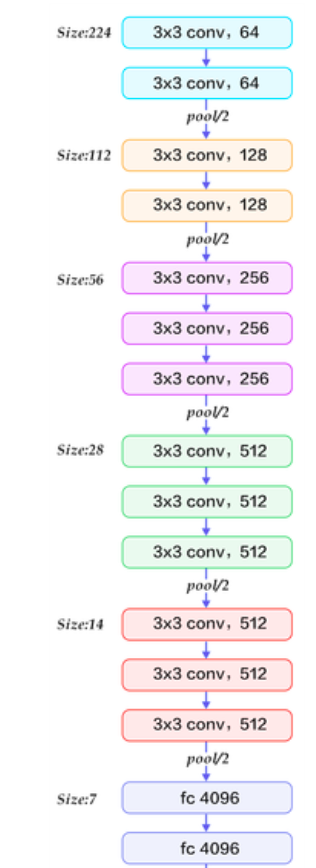

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

vgg_16 = Sequential()

# Block 1
vgg_16.add(
    Conv2D(
        filters = 64, 
        kernel_size = (3, 3), 
        strides = (1, 1), 
        padding = "same", 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 64, 
        kernel_size = (3, 3), 
        strides = (1, 1), 
        padding = "same", 
        activation = tf.nn.relu
    )
)

vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 2
vgg_16.add(
    Conv2D(
        filters = 128,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 128,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)

vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 3
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 256,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 4
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# Block 5
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Conv2D(
        filters = 512,
        kernel_size = (3, 3),
        strides = (1, 1),
        padding = "same",
        activation = tf.nn.relu
    )
)
vgg_16.add(
    MaxPooling2D(
        pool_size = (2, 2), 
        strides = (2, 2)
    )
)
# block 6
vgg_16.add(Flatten())
vgg_16.add(
    Dense(
        units = 4096, 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Dropout(rate = 0.5)
)
vgg_16.add(
    Dense(
        units = 4096, 
        activation = tf.nn.relu
    )
)
vgg_16.add(
    Dropout(rate = 0.5)
)
vgg_16.add(
    Dense(
        units = 10, 
        activation = tf.nn.softmax
    )
)
vgg_16.build(input_shape = (None, 32, 32, 3))
vgg_16.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [7]:
vgg_16.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy, 
    optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5), 
    metrics = ['accuracy']
)

In [8]:
def lr_scheduler(epoch, lr):
    if epoch <= 15:
        return lr
    else:
        return lr * np.exp(-0.1)

In [9]:
mc = tf.keras.callbacks.ModelCheckpoint(
    filepath = "epoch: {epoch:02d}.hdf5", 
    monitor = 'val_loss',
    mode = 'min', 
    verbose = 0,
    save_best_only = False
)
lrs = tf.keras.callbacks.LearningRateScheduler(lr_scheduler, verbose = 0)
history = vgg_16.fit(
    X_train, y_train,
    epochs = 30,
    batch_size = 512,
    validation_data = (X_valid, y_valid),
    callbacks = (mc, lrs)
)

Epoch 1/30
88/88 [==============================] - 88s 554ms/step - loss: 2.1709 - accuracy: 0.1591 - val_loss: 1.9918 - val_accuracy: 0.1996
Epoch 2/30
88/88 [==============================] - 36s 413ms/step - loss: 1.9620 - accuracy: 0.2100 - val_loss: 1.9015 - val_accuracy: 0.2356
Epoch 3/30
88/88 [==============================] - 36s 414ms/step - loss: 1.8546 - accuracy: 0.2580 - val_loss: 1.7496 - val_accuracy: 0.3028
Epoch 4/30
88/88 [==============================] - 36s 414ms/step - loss: 1.7331 - accuracy: 0.3139 - val_loss: 1.6246 - val_accuracy: 0.3584
Epoch 5/30
88/88 [==============================] - 36s 414ms/step - loss: 1.6115 - accuracy: 0.3710 - val_loss: 1.5455 - val_accuracy: 0.4012
Epoch 6/30
88/88 [==============================] - 36s 415ms/step - loss: 1.5217 - accuracy: 0.4143 - val_loss: 1.4102 - val_accuracy: 0.4644
Epoch 7/30
88/88 [==============================] - 36s 415ms/step - loss: 1.4415 - accuracy: 0.4508 - val_loss: 1.3466 - val_accuracy: 0.4988

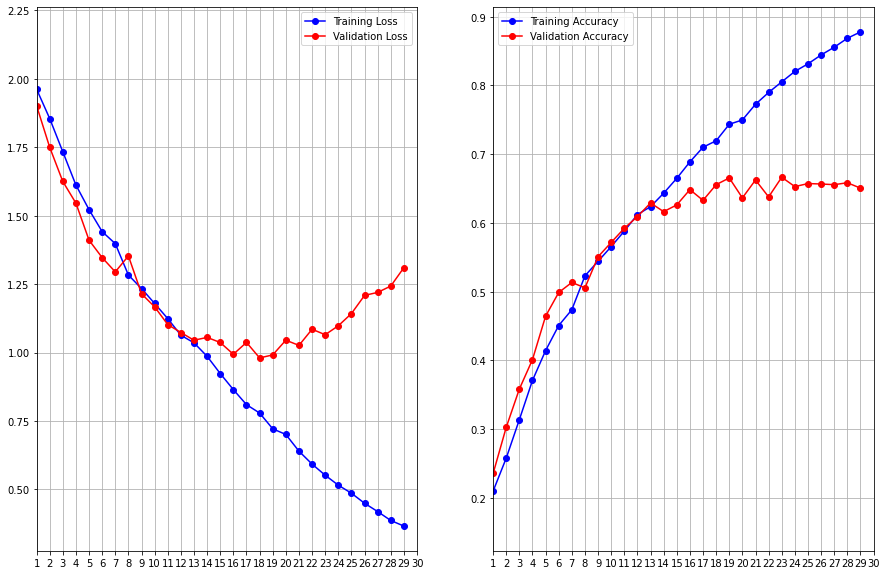

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 10))
axes[0].plot(history.history['loss'], color = 'b', marker = 'o', label = 'Training Loss')
axes[0].plot(history.history['val_loss'], color = 'r', marker = 'o', label = 'Validation Loss')
axes[0].set(xticks = np.arange(1, 31, step = 1), xlim = (1, 30))
axes[0].grid(True)

axes[1].plot(history.history['accuracy'], color = 'b', marker = 'o', label = 'Training Accuracy')
axes[1].plot(history.history['val_accuracy'], color = 'r', marker = 'o', label = 'Validation Accuracy')
axes[1].set(xticks = np.arange(1, 31, step = 1), xlim = (1, 30))
axes[1].grid(True)

axes[0].legend()
axes[1].legend()

Ta chọn mô hình ở epoch thứ 13 vì loss và accuracy trên tập validation từ epoch thứ 13 trở đi không cải thiện, và các mô hình từ sau epoch 13 có xu hướng overfit

In [11]:
model = tf.keras.models.load_model("/content/epoch: 13.hdf5")
result = model.evaluate(X_test, y_test)
print("Loss và Accuracy trên tập test của mô hình được chọn là {} {}".format(result[0],result[1]))

313/313 [==============================] - 8s 22ms/step - loss: 1.0902 - accuracy: 0.5977
Loss và Accuracy trên tập test của mô hình được chọn là 1.0901521444320679 0.5976999998092651
